# Multi Modal Language Models Introduction

In this tutorial, we will be covering Multi-Modal Language Models (MMLMs) leveraging on Ollama using Llava:13b-v1.6 open-source model.

## Environment Setup

Follow our [tutorial on Apptainer](https://www.deeplearningwizard.com/language_model/containers/hpc_containers_apptainer/) to get started. Once you have followed the tutorial till the [Ollama section](https://www.deeplearningwizard.com/language_model/containers/hpc_containers_apptainer/#ollama-gemma-workloads) where you successfully ran `ollama serve` and `ollama run llava:13b-v1.6`, you can run the `apptainer shell --nv --nvccli apptainer_container_0.1.sif` command followed by `jupyter lab` to access and run this notebook.

!!! info  "Directory Guide"

    When you shell into the Apptainer `.sif` container, you will need to navigate the directory as you normally would into the Deep Learning Wizard repository that you cloned, requiring you to `cd ..` to go back a few directories and finally reaching the right folder. 

## Images

We will be using images to show the power of Multi-Modal Language Models (MMLMs). As such, there is a special section on downloading, loading, and making the images machine readable by MMLMs.

### Generic Function to Save Images

The following function is a simple function to download any image from a given link. In this tutorial we will only be using images from [Unsplash](https://unsplash.com/) which is a fantastic website of royalty-free images!

In [37]:
import requests

def save_image(url, image_path):
    # Send a GET request to the URL
    response = requests.get(url, stream=True)
    
    # Check that the request was successful
    if response.status_code == 200:
        # Open a file in write-binary mode
        with open(image_path, 'wb') as file:
            # Write the contents of the response to the file
            for chunk in response.iter_content(1024):
                file.write(chunk)

### Get Image

We will be downloading an image of an elephant for our first run.

In [2]:
# Make directory, one off
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [16]:
# The URL of the image from royalty free site unsplash
url = 'https://unsplash.com/photos/q0xtwUY8Rd4/download?ixid=M3wxMjA3fDB8MXxhbGx8NTR8fHx8fHwyfHwxNzEwMjA3MDQ4fA&force=true&w=640'
# Path to save
image_path = './images/elephant.jpg'

save_image(url, image_path)

### Show Image

Here, we use IPython's function to display image in our Jupyter Lab notebook and you can see a very lovely elephant enjoying his greens.

In [17]:
from IPython.display import Image

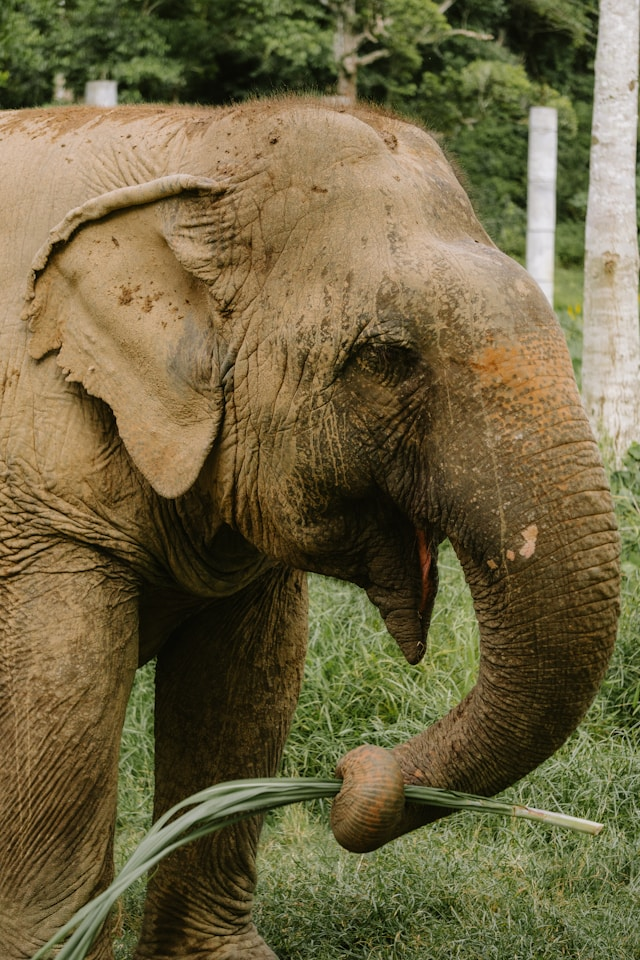

In [26]:
# Create an Image object
image = Image(filename=image_path)

# Display the image
display(image)

### Configure Image to base64

Language models such as GPT-3 or GPT-4 are primarily built to handle and generate textual data. They are not inherently equipped to interpret or understand non-textual data like images.

To use an image as an input for a language model, it's necessary to transform it into a format that the model can process. A prevalent approach is to convert the image into a Base64 string.

Base64 is an encoding scheme that converts binary data into an ASCII string format. This transformation enables us to represent the image as a lengthy text string, which can subsequently be inputted into the language model.

It's crucial to note that despite the image being converted into a format that the model can technically process, the model won't "comprehend" the image in the same manner as humans do. It won't identify objects, individuals, or scenes in the image. It will merely perceive the Base64 string as textual data.

To enable language models to "understand" images, additional methods and models are required, such as convolutional neural networks (CNNs) for image recognition tasks. These models can be trained to interpret the features of an image and can be integrated with language models to develop more advanced AI systems capable of handling multimodal inputs (both text and images).

In conclusion, we convert images to Base64 to feed them to language models because it enables us to represent the image in a format that the model can process. However, it doesn't allow the model to understand the image in the same way a human or a specialized image processing model would.


In [19]:
import base64

# Function to encode image file to base64
def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [20]:
# Encode image to base64
image_base64 = encode_image_to_base64(image_path)

In [21]:
# This is what it looks like after encoding
image_base64[:100]

'/9j/4AAQSkZJRgABAQEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABh'

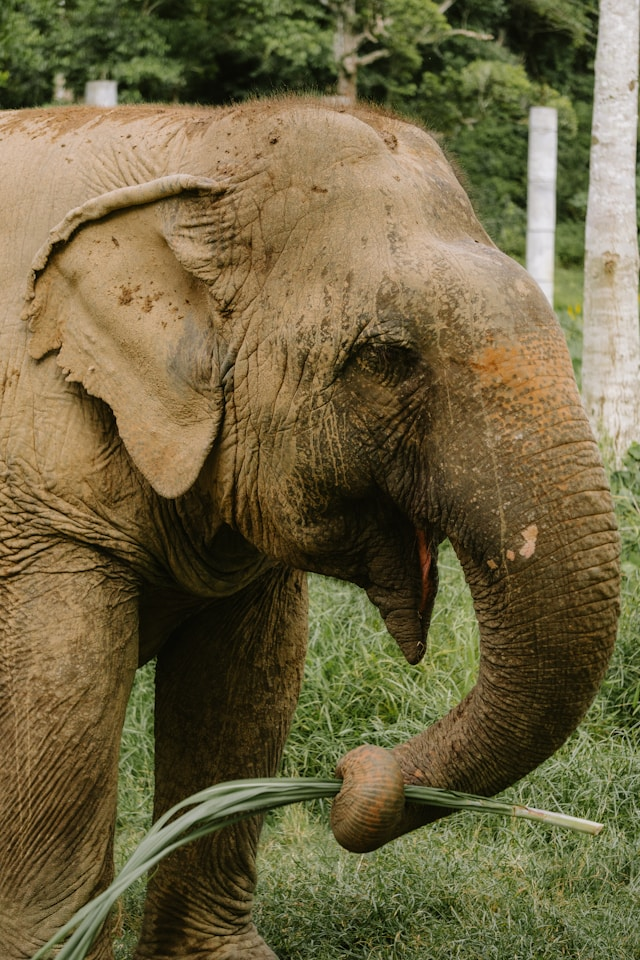

In [22]:
# Same image decoded
display(Image(base64.b64decode(image_base64)))

It may be me, but I find it really fascinating how from the very long string above, we can reconstruct the awesome elephant.

## Run Multi Modal Language Model (MMLM)

In this section, we will explore multiple use cases of MMLM like:

- Object Detection
- Image Description
- Text Recognition
- Text Recognition with Universal Translation.

The list is non-exhaustive, there is so many things you can do with MMLMs!

## Use Case 1: Object Detection
In this first example, we show how we can feed a photo for object detection.

In [23]:
# Import the Ollama module
import ollama

In [24]:
# Prepare the message to send to the LLaVA model
# The 'content' field should contain your request,
# and the 'images' field should contain a list of image paths
message = {
    'role': 'user',
    'content': 'What animal is in this picture?',
    'images': [image_base64]
}

# Use the ollama.chat function to send the image and retrieve the description
# The 'model' field specifies the desired LLaVA model size, and the 'messages' field should contain your prepared message
response = ollama.chat(
    model="llava:13b-v1.6",
    messages=[message]
)

# Print the model's description of the image
print(response['message']['content'])

 The animal in the picture is an elephant.


It is fascinating how MMLMs are like a universal object detector (within the data distribution they've been trained on).

## Use Case 2a: Image Description with Simple Scene
Here we go one step further beyond object detection to explain the scene of an image beyond just objects within it.

In [25]:
# Prepare the message to send to the LLaVA model
# The 'content' field should contain your request,
# and the 'images' field should contain a list of image paths
message = {
    'role': 'user',
    'content': 'Describe what is in the picture?',
    'images': [image_base64]
}

# Use the ollama.chat function to send the image and retrieve the description
# The 'model' field specifies the desired LLaVA model size, and the 'messages' field should contain your prepared message
response = ollama.chat(
    model="llava:13b-v1.6",
    messages=[message]
)

# Print the model's description of the image
print(response['message']['content'])

 The image shows an elephant with its trunk curled up towards its mouth, as if it is eating or smelling something. The elephant has prominent ears and is standing on grass in what appears to be a natural outdoor setting, possibly in a zoo enclosure given the presence of a fence structure and greenery. The elephant's skin looks dusty or damp, indicating recent activity or weather conditions.


## Use Case 2b: Image Description with Complex Scene
We push the boundaries of MMLMs with a more complex scene, and you can see how it copes really well.

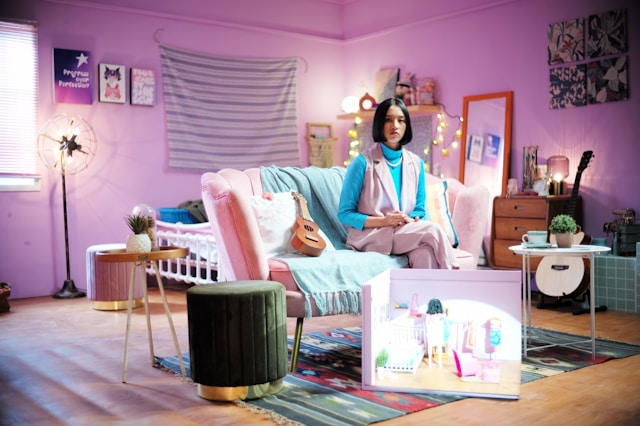

In [12]:
# The URL of the image from royalty free site unsplash
url = 'https://unsplash.com/photos/p7af3FEGb44/download?ixid=M3wxMjA3fDB8MXxhbGx8NzB8fHx8fHwyfHwxNzEwMjI2ODQyfA&force=true&w=640'

# Path to save
image_path = './images/room_with_person.jpg'

# Save the image
save_image(url, image_path)

# Encode image 
image_base64 = encode_image_to_base64(image_path)

# Show image decoded
display(Image(base64.b64decode(image_base64)))

In [14]:
# Prepare the message to send to the LLaVA model
# The 'content' field should contain your request,
# and the 'images' field should contain a list of image paths
message = {
    'role': 'user',
    'content': 'Describe what is in the picture and the mood of it?',
    'images': [image_base64]
}

# Use the ollama.chat function to send the image and retrieve the description
# The 'model' field specifies the desired LLaVA model size, and the 'messages' field should contain your prepared message
response = ollama.chat(
    model="llava:13b-v1.6",
    messages=[message]
)

# Print the model's description of the image
print(response['message']['content'])

 The image shows an interior scene with a person seated on a pink sofa in a cozy living room. The individual is facing the camera and appears to be engaged in some activity, possibly related to work or hobbies as indicated by the presence of what looks like makeup items or craft supplies nearby.

The room has a whimsical vibe, with pastel pink walls, furniture that includes a bright pink sofa and matching chairs, and an eclectic mix of decorations on the walls, such as posters, paintings, and other personal touches. The lighting is warm, creating a relaxed atmosphere. A small, colorful rug adds to the playful nature of the space.

The overall mood of the picture is cheerful and casual, suggesting a comfortable and creative environment where the individual might enjoy spending time engaging in various activities.


### Use Case 3a: Text Recognition
Besides MMLMs being universal object detectors, scene descriptors, it is also a universal text recognition model.

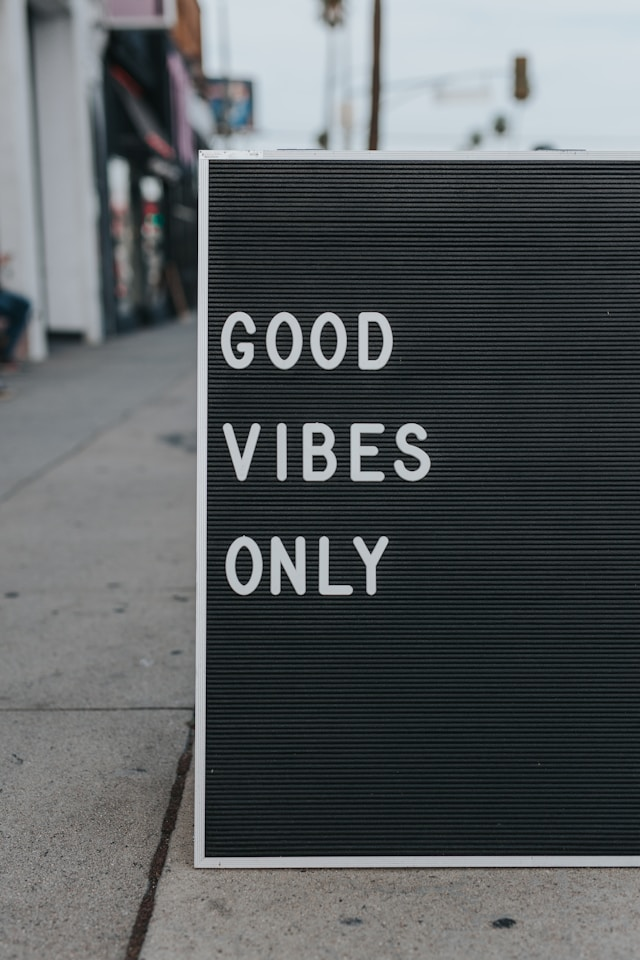

In [33]:
# The URL of the image from royalty free site unsplash
url = 'https://unsplash.com/photos/muS2RraYRuQ/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8OHx8c2ltcGxlJTIwdGV4dHxlbnwwfHx8fDE3MTAyNDE0MDZ8MA&force=true&w=640'

# Path to save
image_path = './images/text_picture.jpg'

# Save the image
save_image(url, image_path)

# Encode image 
image_base64 = encode_image_to_base64(image_path)

# Show image decoded
display(Image(base64.b64decode(image_base64)))

In [34]:
# Prepare the message to send to the LLaVA model
# The 'content' field should contain your request,
# and the 'images' field should contain a list of image paths
message = {
    'role': 'user',
    'content': 'What text is in the picture?',
    'images': [image_base64]
}

# Use the ollama.chat function to send the image and retrieve the description
# The 'model' field specifies the desired LLaVA model size, and the 'messages' field should contain your prepared message
response = ollama.chat(
    model="llava:13b-v1.6",
    messages=[message]
)

# Print the model's description of the image
print(response['message']['content'])

 The text in the picture says "GOOD VIBES ONLY."


The MMLM managed to accurately detect the text. Though, upon experimenting with more complicated images like a whole menu, it does make errors. But, hey, imagine how models are improving at an exponential rate and in a few years, we will be having a perfectly working one for complex text scenes.

### Use Case 3b: Text Recognition with Universal Translation

In [36]:
# Prepare the message to send to the LLaVA model
# The 'content' field should contain your request,
# and the 'images' field should contain a list of image paths
message = {
    'role': 'user',
    'content': 'What text is in the picture, translate to French?',
    'images': [image_base64]
}

# Use the ollama.chat function to send the image and retrieve the description
# The 'model' field specifies the desired LLaVA model size, and the 'messages' field should contain your prepared message
response = ollama.chat(
    model="llava:13b-v1.6",
    messages=[message]
)

# Print the model's description of the image
print(response['message']['content'])

 Le texte dans la photo est en anglais et il dit "GOOD VIBES ONLY". Pour traduire cela en français, on pourrait dire "DE BONNES ONDAS SOLEMENT".


Using Google Translate, because I have no knowledge of French, above translates to:

> The text in the photo is in English and it says "GOOD VIBES ONLY". To translate this into French, we could say "DE BONNES ONDAS SOLEMENT".


This is really the one that is interesting, where you can not only detect text, but also instantly translate it to any language!

## Summary

There really is no limits to MMLMs where we will continually add more use cases to this tutorial, but it shows a glimpse of what is possible. 

We covered how to prepare images such that MMLMs can understand them using base64 encoding. Subsequently, we covered object detection, scene description, text recognition, and text translation. If you're being adventurous you can do all 4 in a single prompt.